In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp
from sympy.vector import CoordSys3D
from IPython.display import Video

from matplotlib import animation, rc
from IPython.display import HTML, display
rc('animation', html='jshtml')
import seaborn as sns
C = CoordSys3D('')

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('poster', font_scale=0.8,  rc={"lines.linewidth": 5})

## Problema (Astronauta)

<font size=3px>Um astronauta está a deriva no espaço. Uma estação espacial está se afastando do astronauta com uma velocidade $\vec{V}$ (ver figura). O astronauta decide expor seu braço, quebrá-lo e lançá-lo de tal forma que possa alcançar a estação. Dado que a velocidade máxima (em módulo) com que o astronauta consegue lançar o braço é $v_0$, determine qual deve ser o ângulo máximo de lançamento ($\theta$) para que ele alcance a estação. 
    <img src="astronautaBraco.png" alt="Drawing" style="width: 350px;"/>
</font>

In [2]:
Video("Love, Death & Robots - Helping Hand - One Thing Leads To Another.mp4")

In [3]:
#Definir variaveis/parametros:
m,M,v0,v,tt,vax,vay = sp.symbols('m,M,v_0,v,theta,v^a_x,v^a_y')

In [4]:
#Adotando um sistema onde a estação se desloca a direção do eixo x e o eixo y aponta para cima:
#momento inicial (astronauta + braço)
p0 = 0*C.i + 0*C.j
#momento final
v0v = -v0*sp.cos(tt)*C.i-v0*sp.sin(tt)*C.j
pf = m*v0v + M*(vax*C.i+vay*C.j)
#velocidade do astronauta:
vxsol = sp.solve(sp.Eq(p0.dot(C.i),pf.dot(C.i)),vax)[0]
vysol = sp.solve(sp.Eq(p0.dot(C.j),pf.dot(C.j)),vay)[0]

In [5]:
#Para que o astronauta alcance a estação:
ttmax = sp.solve(sp.Eq(vxsol,v),tt)[1]
sp.Eq(sp.cos(tt),sp.cos(ttmax))

Eq(cos(theta), M*v/(m*v_0))

## Problema (Plano Inclinado - Momento)

<font size=3px>
    No centro de distribuição de uma transportadora de carga, um carrinho aberto com massa de $M = 50$ kg desliza da direita para a esquerda com velocidade escalar de $v_0 = 5,0$ m/s. Despreze o atrito entre o carrinho e o piso. Um pacote de $m = 15,0$ kg desliza de cima para baixo por uma calha de transporte que está inclinada a $\theta = 60^{\circ}$ do plano horizontal e deixa o final da calha com velocidade de $v = 20,0$ m/s. O pacote
cai dentro do carrinho, e eles andam juntos. Considerando que o final da calha está a uma distância vertical de $ h = 1$ m acima do fundo do carrinho, quais são
<br>
  a) o módulo da componente horizontal da velocidade do pacote
  pouco antes de cair dentro do carrinho, <br>
  b) o vetor velocidade final (após a colisão) do carrinho e<br>
  c) o impulso gerado pela normal no sistema carrinho $+$ pacote?    
</font>
<img src="Jean-colisao-fig01.png" alt="Drawing" style="width: 350px;"/>

In [6]:
#Definir variaveis/parametros:
m,M,v0,v,tt,h,t,g,vf = sp.symbols('m,M,v_0,v,theta,h,t,g,v_f',positive=True)
subsList = [(M,50.),(v0,5.0),(m,15.),(tt,np.pi/3),(v,20.),(g,9.8),(h,1.0)]

In [7]:
#item a)
#Adotando um sistema de coordenadas com origem no solo embaixo do plano, com y apontando para cima e x para a direita:
#Trajetória do pacote:
r0v = h*C.j
v0v = v*sp.cos(tt)*C.i -v*sp.sin(tt)*C.j
r = lambda t: r0v + v0v*t -(g/2)*t**2*C.j
r(t)

(t*v*cos(theta))*.i + (-g*t**2/2 + h - t*v*sin(theta))*.j

In [8]:
#Velocidade do pacote:
vc = sp.diff(r(t),t)
vc

(v*cos(theta))*.i + (-g*t - v*sin(theta))*.j

In [9]:
#O pacote atinge o carrinho quando y = 0:
tsol = sp.solve(sp.Eq(r(t).dot(C.j),0),t)[0]
tsol

(-v*sin(theta) + sqrt(2*g*h + v**2*sin(theta)**2))/g

In [10]:
#Neste instante a velocidade do pacote é:
vsol = sp.simplify(vc.subs(t,tsol))
resp = display(vsol.dot(C.i))
vsol.subs(subsList).evalf(3)

v*cos(theta)

10.0*.i + (-17.9)*.j

In [11]:
#Como o momento na direção horizontal é conservado:
p0 = -M*v0*C.i + m*vsol.dot(C.i)*C.i
#Após a colisão:
pf = (m+M)*vf*C.i
sp.Eq(p0,pf)

Eq((-M*v_0 + m*v*cos(theta))*.i, (v_f*(M + m))*.i)

In [12]:
vfsol = sp.solve(sp.Eq(p0.dot(C.i),pf.dot(C.i)),vf)[0]
resp = display(vfsol)
vfsol.subs(subsList).evalf(3)

(-M*v_0 + m*v*cos(theta))/(M + m)

-1.54

In [13]:
#item c)
#A componente vertical do momento não é conservada, devido à atuação da força normal durante a colisão do pacote
#com o carrinho
#Logo a variação de momento vertical será igual ao impulso da força normal:
py0 = m*vsol.dot(C.j)*C.j
pyf = 0*C.j
I = pyf-py0
resp = display(I)
I.subs(subsList).evalf(3)

(m*sqrt(2*g*h + v**2*sin(theta)**2))*.j

268.0*.j

## Problema (Míssil)

<font size=3px>
Um míssil de massa $M = 50$ kg é lançado com um ângulo $\theta = 60^\circ$ e velocidade inicial $v_0 = 200$ m/s. O míssil explode a $\frac{3}{4}h$, onde $h$ seria a altura do ponto mais alto de sua trajetória. Imediatamente após a explosão dois fragmentos idênticos de massa $M/2$ são produzidos. Um deles é lançado horizontalmente para frentecom velocidade $v_1 = 100$ m/s, enquanto o segundo atinge o solo em algum ponto desconhecido. A que distância do ponto de lançamento do míssil você enviaria uma equipe para recuperar o segundo pedaço?
</font>

In [62]:
#Definir variaveis/parametros:
M,v0,tt,h,t,g,v1,v2x,v2y = sp.symbols('M,v_0,theta,h,t,g,v_1,v_2^x,v_2^y',positive=True)
subsList = [(M,50.),(tt,np.pi/3),(v0,200),(v1,100.),(g,9.8)]

In [63]:
#A trajetória do míssil é:
v0v = v0*sp.cos(tt)*C.i + v0*sp.sin(tt)*C.j
r = lambda t: v0v*t - (g/2)*t**2*C.j
v = sp.diff(r(t),t)
r(t)

(t*v_0*cos(theta))*.i + (-g*t**2/2 + t*v_0*sin(theta))*.j

In [64]:
#O ponto mais alto da trajetória ocorre quanto v0y = 0 (aplicando Torricelli):
hsol = sp.solve(sp.Eq(v0v.dot(C.j)**2-2*g*h,0),h)[0]
hsol
#Logo o instante da explosão será dado por:
tsol = sp.solve(sp.Eq(r(t).dot(C.j),3*hsol/4),t)[0]
tsol

v_0*sin(theta)/(2*g)

In [65]:
#Neste instante a velocidade do míssil é:
ve = v.subs(t,tsol)
ve

(v_0*cos(theta))*.i + (v_0*sin(theta)/2)*.j

In [66]:
#Aplicando conservação de momento imediatamente antes e depois da explosão:
m1 = M/2
m2 = M/2
p0 = M*ve
pf = m1*v1*C.i + (M-m1)*(v2x*C.i+v2y*C.j)
v2xsol = sp.solve(sp.Eq(p0.dot(C.i),pf.dot(C.i)),v2x)[0]
v2ysol = sp.solve(sp.Eq(p0.dot(C.j),pf.dot(C.j)),v2y)[0]
v2v = v2xsol*C.i + v2ysol*C.j
v2v

(2*v_0*cos(theta) - v_1)*.i + (v_0*sin(theta))*.j

In [67]:
#Adotando agora t=0 como o momento da explosão, a posição do segundo pedaço no momento da explosão é:
r20v = sp.simplify(r(t).subs(t,tsol))
#Logo a trajetória do segundo pedaço será:
r2 = lambda t: r20v + v2v*t - (g/2)*t**2*C.j
r2(t)

(t*(2*v_0*cos(theta) - v_1) + v_0**2*sin(2*theta)/(4*g))*.i + (-g*t**2/2 + t*v_0*sin(theta) + 3*v_0**2*sin(theta)**2/(8*g))*.j

In [68]:
#O pedaço atingirá o solo quando:
t2sol = sp.simplify(sp.solve(sp.Eq(r2(t).dot(C.j),0),t)[1])
t2sol

v_0*(2 + sqrt(7))*sin(theta)/(2*g)

In [71]:
#Neste instante o alcance do segundo pedaço será:
df = sp.simplify(r2(t).subs(t,t2sol).dot(C.i))
resp = display(df)
df.subs(subsList).evalf(8)

v_0*(v_0*sin(2*theta) + (4 + 2*sqrt(7))*(2*v_0*cos(theta) - v_1)*sin(theta))/(4*g)

4989.1470

In [76]:
#Instante da explosão:
te = float(tsol.subs(subsList).evalf())


#Trajetória do míssil:
xF = lambda tv: float(r(t).dot(C.i).subs(subsList+[(t,tv)]).evalf())
yF = lambda tv: float(r(t).dot(C.j).subs(subsList+[(t,tv)]).evalf())

#Trajetória do pedaço 1:
x1F = lambda tv: float((r20v+v1*t*C.i-g*t**2/2*C.j).dot(C.i).subs(subsList+[(t,tv-te)]).evalf())
y1F = lambda tv: float((r20v+v1*t*C.i-g*t**2/2*C.j).dot(C.j).subs(subsList+[(t,tv-te)]).evalf())


#Trajetória do pedaço 2:
x2F = lambda tv: float(r2(t).dot(C.i).subs(subsList+[(t,tv-te)]).evalf())
y2F = lambda tv: float(r2(t).dot(C.j).subs(subsList+[(t,tv-te)]).evalf())


tmin = 0.
tmax = 50.
dt = 0.5
tA = tmin
tpts = np.linspace(tmin,tmax,int((tmax-tmin)/dt)+1)
ymin = 0
ymax = max([yF(tv) for tv in tpts])
xmin = 0
xmax = float(df.subs(subsList).evalf())



fig = plt.figure(figsize=(12,7))
xlabel = plt.xlabel('x (m)')
ylabel = plt.ylabel('y (m)')

xyLine, = plt.plot([xF(tmin)],[yF(tmin)],color='b',alpha=0.5)
x1Line, = plt.plot([x1F(tmin)],[y2F(tmin)],color='g',alpha=0.8)
x2Line, = plt.plot([x2F(tmin)],[y1F(tmin)],color='r',alpha=0.8)

plt.ylim(ymin,3.1*ymax)
plt.xlim(xmin,1.1*xmax)
title = plt.title(r't = %1.2g s' %(tmin))
plt.tight_layout()

def init():
    xyLine.set_data([-10],[-10])
    x1Line.set_data([-10],[-10])
    x2Line.set_data([-10],[-10])
    
    return (xyLine,x1Line,x2Line)

def animate(i):
    tA = tmin+i*dt
    xpts  = [xF(tv) for tv in tpts if tv <= tA]
    ypts  = [yF(tv) for tv in tpts if tv <= tA]
    xyLine.set_data(xpts,ypts)
    if tA < te:
        xyLine.set_alpha(1.0)
    else:
        xyLine.set_alpha(0.5)
    if tA >= te:
        x1pts  = [x1F(tv) for tv in tpts if te <= tv <= tA]
        y1pts  = [y1F(tv) for tv in tpts if te <= tv <= tA]
        x1Line.set_data(x1pts,y1pts)
        
        x2pts  = [x2F(tv) for tv in tpts if te <= tv <= tA]
        y2pts  = [y2F(tv) for tv in tpts if te <= tv <= tA]
        x2Line.set_data(x2pts,y2pts)        
        
    title.set_text(r't = %1.2g s' %(tA))
    return (xyLine,x1Line,x2Line)
    

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=100, 
                               blit=True)
anim.save('missilMomento.mp4', fps=15, extra_args=['-vcodec', 'libx264'])
plt.close()
anim

### Problema (Colisão 2D)

<font size=3px>
Um objeto de massa $m_1$ , que se move no sentido positivo do eixo $x$ com velocidade $v$, colide com outro
objeto de massa $m_2$ , que se move no sentido positivo do eixo $y$ com velocidade $v \sqrt{3}$. A colisão
 é perfeitamente inelástica e o sistema move-se com velocidade final $v\sqrt{2}$. Encontre a razão entre as massas $r = m_1/m_2$.
</font>

In [36]:
#Definir variaveis/parametros:
m1,m2,v10,v20,vf,v,tt = sp.symbols('m_1,m_2,v_1^0,v_2^0,v_f,v,theta')

In [37]:
#Momento inicial:
v10 = v
v20 = v*sp.sqrt(3)
vf = v*sp.sqrt(2)
p0v = m1*v10*C.i + m2*v20*C.j
#Momento final:
pfv = (m1+m2)*vf*(sp.cos(tt)*C.i+sp.sin(tt)*C.j)
pfv

(sqrt(2)*v*(m_1 + m_2)*cos(theta))*.i + (sqrt(2)*v*(m_1 + m_2)*sin(theta))*.j

In [41]:
#Impondo conservação de momento (p0^2 = pf^2):
m1sol = sp.solve(sp.Eq(p0v.dot(p0v),pfv.dot(pfv)),m1)[0]
resp =display(m1sol)
m1sol.evalf()

m_2*(-2 + sqrt(5))

0.23606797749979*m_2

### Problema (Colisão e Energia)

<font size=3px>
Considere um trilho sem atrito ABC como mostrado na figura.
Um bloco de massa $m_1$ é solto em $A$ de uma altura $h$. Ele sofre uma colisão elástica frontal em $B$ com um
bloco de massa $m_2 > m_1$ que está inicialmente em repouso.<br>
    a) Determine a velocidade dos dois blocos logo após a colisão.<br>
    b) Calcule a altura máxima que o bloco de massa $m_1$ alcança após a colisão.<br>
<img src="Jean-colisao-fig2.png" alt="Drawing" style="width: 350px;"/>    
</font>

In [50]:
#Definir variaveis/parametros:
m1,m2,h,g,v0,v1,v2,h2 = sp.symbols('m_1,m_2,h,g,v_0,v_1,v_2,h_2')

In [51]:
#item a)
#Velocidade antes da colisão:
v0sol = sp.solve(sp.Eq(m1*g*h,m1*v0**2/2),v0)[1]
#Momento antes da colisão:
p0 = m1*v0sol
#Energia cinética antes da colisão:
K0 = m1*v0sol**2/2
#Momento após a colisção:
pf = m1*v1 + m2*v2
Kf = m1*v1**2/2 + m2*v2**2/2

In [52]:
#Impondo conservação de energia e momento:
vsol = sp.solve([sp.Eq(p0,pf),sp.Eq(K0,Kf)],(v1,v2))[1]
v1sol = sp.simplify(vsol[0])
v2sol = sp.simplify(vsol[1])
resp = display(sp.Eq(v1,v1sol))
resp = display(sp.Eq(v2,v2sol))

Eq(v_1, sqrt(2)*sqrt(g*h)*(m_1 - m_2)/(m_1 + m_2))

Eq(v_2, 2*sqrt(2)*m_1*sqrt(g*h)/(m_1 + m_2))

In [45]:
#item b)
#A altura máxima será dada por:
Ef = m1*g*h2
E0 = m1*v1sol**2/2
hsol = sp.solve(sp.Eq(E0,Ef),h2)[0]
resp = display(sp.Eq(h2,hsol))

Eq(h_2, h*(m_1 - m_2)**2/(m_1 + m_2)**2)

### Problema (Colisão Bloco)

<font size=3px>
Um projétil de massa $m = 4,0$ g é disparado horizontalmente com velocidade de $v_0 = 400$ m/s contra um bloco de madeira de massa $M = 800$ g, inicialmente em repouso sobre uma superfície horizontal. O projétil atravessa o bloco e emerge com uma velocidade de $v_1 = 100$ m/s. O bloco desliza ao longo da superfície e pára após andar $d = 45,0$ m.<br>
a) Qual é a variação da energia cinética do projétil?<br>
b) Qual é a energia cinética do bloco no instante em que o projétil emerge do bloco?<br>
c) Qual é o coeficiente de atrito cinético entre o bloco e a superfície?
</font>

In [46]:
#Definir variaveis/parametros:
m,M,v0,g,d,muk,v2 = sp.symbols('m,M,v_0,g,d,mu_k,v_2')
subsList = [(m,4e-3),(v0,400),(M,0.8),(v1,100),(d,45),(g,9.8)]

In [47]:
#item a)
#Energia cinética inicial:
K0 = m*v0**2/2
#Energia cinética final:
K1 = m*v1**2/2
resp = display(K1-K0)
(K1-K0).subs(subsList).evalf(3)

-m*v_0**2/2 + m*v_1**2/2

-300.

In [48]:
#item b)
#Como a colisão ocorre em um intervalo de tempo muito curto, podemos aplicar conservação de momento
#Momento inicial
p0 = m*v0
#Momento final:
pf = m*v1+M*v2
#Impondo conservação de momento:
v2sol = sp.solve(sp.Eq(p0,pf),v2)[0]
resp = display(sp.Eq(v2,v2sol))
#Energia cinética
K2 = M*v2sol**2/2
resp = display(K2)
K2.subs(subsList).evalf(3)

Eq(v_2, m*(v_0 - v_1)/M)

m**2*(v_0 - v_1)**2/(2*M)

0.900

In [49]:
#item c)
#Temos que o trabalho da força de atrito é
W = -d*M*g*muk
#E como o trabalho é a variação da energia cinética:
muksol = sp.solve(sp.Eq(W,0-K2),muk)[0]
resp = display(sp.Eq(muk,muksol))
muksol.subs(subsList).evalf(3)

Eq(mu_k, m**2*(v_0 - v_1)**2/(2*M**2*d*g))

0.00255

### Problema (Sol-Terra-Lua)

<font size=3px>
Se ignorarmos a influência dos demais planetas, o sistema Sol-Terra-Lua praticamente não sofre
a influência de forças externas. Determine a posição do centro de massa do sistema, assumindo que a Lua realiza 
uma órbita circular de raio $R_L = 3,8\times 10^8$ m em torno da Terra e que a Terra realiza uma órbita circular de raio $R_T = 1,5 \times 10^{11}$ m. Dados: massa da Terra $M_T = 6 \times 10^{24}$ kg, massa da Lua $M_L = 7 \times 10^{22}$ kg, massa do Sol $M_S = 2 \times 10^{30}$ kg e raio do Sol $R_S = 7 \times 10^8$ m.
</font>

In [23]:
#Definir variaveis/parametros:
MT,ML,MS,RT,RL,RS,tt,fi = sp.symbols('M_T,M_L,M_S,R_T,R_L,R_S,theta,phi')
subsList = [(MT,6e24),(ML,7e22),(MS,2e30),(RT,1.5e11),(RL,3.8e8),(RS,7e8)]

In [24]:
#Assumindo um sistema de coordenadas com o Sol na origem e se theta é o ângulo da órbita terrestre e phi da órbita
#lunar:
rT = RT*sp.cos(tt)*C.i + RT*sp.sin(tt)*C.j
rL = rT+RL*sp.cos(fi)*C.i + RL*sp.sin(fi)*C.j #soma do vetor posição da Terra + vetor Terra-Lua
rS = 0*C.i + 0*C.j

In [25]:
#O centro de massa será dado por:
rCM = sp.simplify((MT*rT + ML*rL + MS*rS)/(MS+ML+MT))

In [26]:
rCM

((M_L*(R_L*cos(phi) + R_T*cos(theta)) + M_T*R_T*cos(theta))/(M_L + M_S + M_T))*.i + ((M_L*(R_L*sin(phi) + R_T*sin(theta)) + M_T*R_T*sin(theta))/(M_L + M_S + M_T))*.j

In [27]:
rCM.subs(subsList).evalf(3)

(13.3*cos(phi) + 4.55e+5*cos(theta))*.i + (13.3*sin(phi) + 4.55e+5*sin(theta))*.j

In [35]:
rCMf = rCM.subs(subsList).subs([(fi,0),(tt,0)])

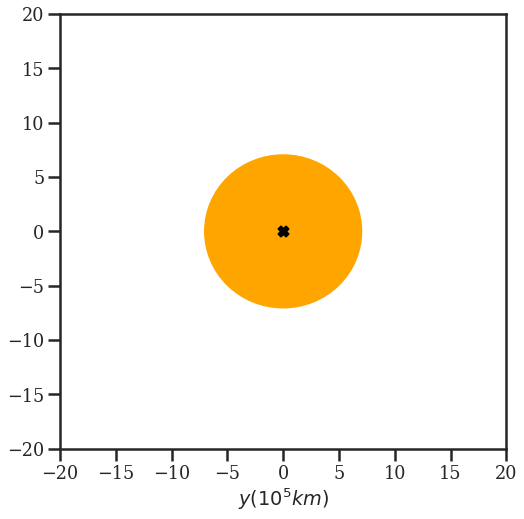

In [54]:
sun = plt.Circle((0, 0), 7, color='orange')
fig, ax = plt.subplots(figsize=(8,8)) # note we must use plt.subplots, not plt.subplot
ax.add_patch(sun)
ax.scatter([float(rCMf.dot(C.i).evalf())/1e8],
            [float(rCMf.dot(C.j).evalf())/1e8],s=100,marker='X',c='black',zorder=10)

plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlabel(r'$x (10^5 km)$')
plt.xlabel(r'$y (10^5 km)$')
plt.savefig('sunCM.png')
plt.show()

### Problema (Basquete)

<font size=3px>
Um jogador de basquete de massa $M$ salta verticalmente para cima e no ponto mais alto do salto, $h$, lança
uma bola de basquete de massa $m$ horizontalmente para frente com velocidade $v$. Determine a que distância do ponto inicial o jogador retornará ao chão.
</font>

In [63]:
#Definir variaveis/parametros:
M,m,v,h,g,t,r1x,r1y = sp.symbols('M,m,v,h,g,t,r_1^x,r_1^y')

In [58]:
#Assumindo um sistema de coordenadas com origem no ponto inicial do salto e considerarmos
#o sistema bola + jogador, a única força externa que atua no sistema é a força gravitacional.
#Então, escolhendo t=0 no ponto mais alto da trajetória:
r0v = h*C.j
v0v = 0*C.j
aCMv = -g*C.j
rCMv = lambda t: r0v + v0v*t + aCMv*t**2/2

In [59]:
rCMv(t)

(-g*t**2/2 + h)*.j

In [60]:
#A posição da bola é dada por:
r20 = h*C.j
v20 = v*C.i
r2v = lambda t: r20 + v20*t + aCMv*t**2/2
r2v(t)

t*v*.i + (-g*t**2/2 + h)*.j

In [61]:
#A posição do jogador (desconhecida é):
r1v = lambda t: r1x*C.i + r1y*C.j

In [65]:
#A posição do CM é dado por:
rCMc = (m*r2v(t) + M*r1v(t))/(m+M)
rCMc

((M*r_1^x + m*t*v)/(M + m))*.i + ((M*r_1^y + m*(-g*t**2/2 + h))/(M + m))*.j

In [70]:
#Logo a posição do jogador em função do tempo é dada por:
r1sol = sp.solve([sp.Eq(rCMv(t).dot(C.i),rCMc.dot(C.i)),sp.Eq(rCMv(t).dot(C.j),rCMc.dot(C.j))],(r1x,r1y))
resp = display(sp.Eq(r1x,r1sol[r1x]))
resp = display(sp.Eq(r1y,r1sol[r1y]))

Eq(r_1^x, -m*t*v/M)

Eq(r_1^y, -g*t**2/2 + h)

In [72]:
#O instante em que o jogador atinge o solo é:
tsol = sp.solve(sp.Eq(r1sol[r1y],0),t)[1]
tsol

sqrt(2)*sqrt(h/g)

In [75]:
#Neste instante a posição do jogador é:
resp = display(sp.Eq(r1x,sp.simplify(r1sol[r1x].subs(t,tsol))))
resp = display(sp.Eq(r1y,r1sol[r1y].subs(t,tsol)))

Eq(r_1^x, -sqrt(2)*m*v*sqrt(h/g)/M)

Eq(r_1^y, 0)

### Problema (Crianças-Barco)

<font size=3px>
Duas crianças (cada uma com massa $m$) sentam em extremos opostos de um barco de massa $M$ e compimento $l$. A criança no fundo do barco joga uma bola de massa $m_0$ com velocidade $v_0$ para a outra criança. Ao mesmo tempo a outra criança lança uma bola com massa $2 m_0$ em direção a outra com velocidade $2 v_0$.
A criança que está no fundo do barco agarra a bola, mas a outra deixa a bola cair na água.<br>
    a) Qual o deslocamento do barco (com relação a posição inicial) no instante em que a criança não consegue agarrar a bola?<br>
    b) Qual a velocidade do barco após a bola cair na água?
</font>

In [87]:
#Definir variaveis/parametros:
M,m,m0,v0,l,xb,vb = sp.symbols('M,m,m_0,v_0,l,x_b,v_b')

In [88]:
#item a)
#Vamos considerar o sistema crianças+bolas+barco e um sistema de coordenas com origem no centro do barco
#(antes do lançamento das bolas)
#Como não existem foras externas atuando na horizontal: xCM = cte
#Antes das bolas serem lançadas:
x1 = -l/2 #posição da criança 1
x2 = l/2 #posição da criança 2
xb1 = -l/2 #posição da bola 1
xb2 = l/2 #posição da bola 2
xB = 0 #posição do CM do barco
#Posição do centro de massa do sistema em t=0:
xCM = (m*x1+m*x2+m0*xb1+2*m0*xb2+M*xB)/(m+m+m0+2*m0+M)
xCM

l*m_0/(2*(M + 2*m + 3*m_0))

In [89]:
#No instante em que a bola escapa:
x1 = xb-l/2 #posição da criança 1
x2 = xb+l/2 #posição da criança 2
xb1 = xb+l/2 #posição da bola 1
xb2 = xb-l/2 #posição da bola 2
xB = xb #posição (desconhecida) do centro do barco
#Posição do centro de massa do sistema em t=0:
xCM2 = (m*x1+m*x2+m0*xb1+2*m0*xb2+M*xB)/(m+m+m0+2*m0+M)
xCM2

(M*x_b + m*(-l/2 + x_b) + m*(l/2 + x_b) + 2*m_0*(-l/2 + x_b) + m_0*(l/2 + x_b))/(M + 2*m + 3*m_0)

In [90]:
#Como xCM é constante:
xbsol = sp.solve(sp.Eq(xCM,xCM2),xb)[0]
xbsol

l*m_0/(M + 2*m + 3*m_0)

In [91]:
#item b)
#Como não existem forças horizontais, o momento total na direção horizontal deve ser conservado.
#Como o momento inicial é nulo, após a bola escapar da criança, devemos ter pT = 0:
v1 = vb #velocidade da criança 1
v2 = vb #velocidade da criança 2
vb1 = v0 #velocidade da bola 1
vb2 = vb #velocidade da bola 2
vB = vb #velocidade (desconhecida) do centro do barco
#Momento total:
pT = m*v1+m*v2 + m0*vb1 + 2*m0*vb2 + M*vB
pT

M*v_b + 2*m*v_b + m_0*v_0 + 2*m_0*v_b

In [92]:
vbsol = sp.solve(sp.Eq(pT,0),vb)[0]
vbsol

-m_0*v_0/(M + 2*m + 2*m_0)